<a href="https://colab.research.google.com/github/Trusha216/CarDetails/blob/car_details/Cardetails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [581]:
from google.colab import drive

In [582]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [583]:
filepath="/content/drive/MyDrive/CAR DETAILS FROM CAR DEKHO (1).csv"

In [584]:
import numpy as np
import pandas as pd

**-> Data Collection**

**use car details dataset**

In [585]:
df=pd.read_csv(filepath)

In [586]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [587]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [588]:
df.shape

(4340, 8)

In [589]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

**-> find and handle missing value**

In [590]:
df.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [591]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [592]:
import matplotlib.pyplot as plt

**-> find and handle outliers**

**-> find outliers in numerical columns**

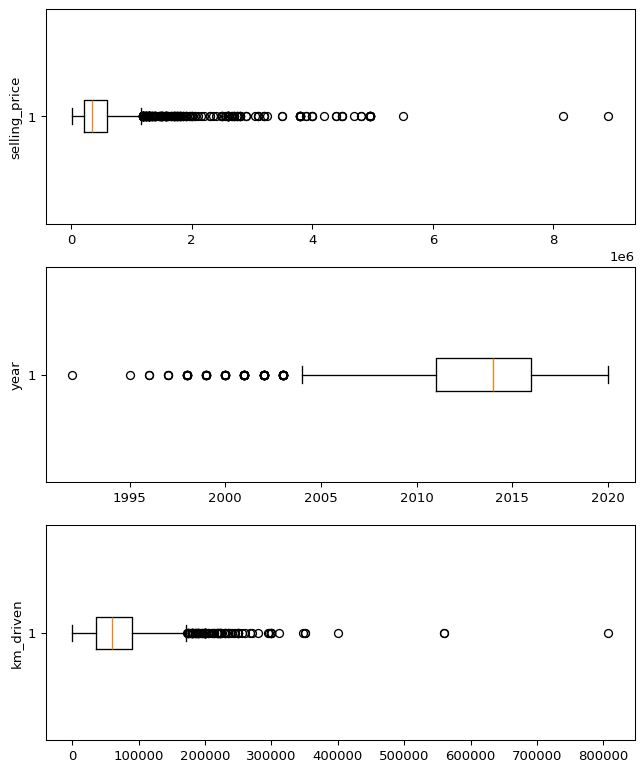

In [593]:
c1=df[["selling_price","year","km_driven"]]
fig,axes=plt.subplots(len(c1.columns),1,dpi=95,figsize=(8,10))
i=0
for col in c1.columns:
  axes[i].boxplot(df[col],vert=False)
  axes[i].set_ylabel(col)
  i=i+1
plt.show()

**-> remove outliers using IQR**

In [594]:
q1=df["selling_price"].quantile(0.25)
q3=df["selling_price"].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df=df[(df["selling_price"]>=lower_bound) & (df["selling_price"]<=upper_bound)]

In [595]:
q1=df["year"].quantile(0.25)
q3=df["year"].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df=df[(df["year"]>=lower_bound) & (df["year"]<=upper_bound)]

In [596]:
q1=df["km_driven"].quantile(0.25)
q3=df["km_driven"].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df=df[(df["km_driven"]>=lower_bound) & (df["km_driven"]<=upper_bound)]

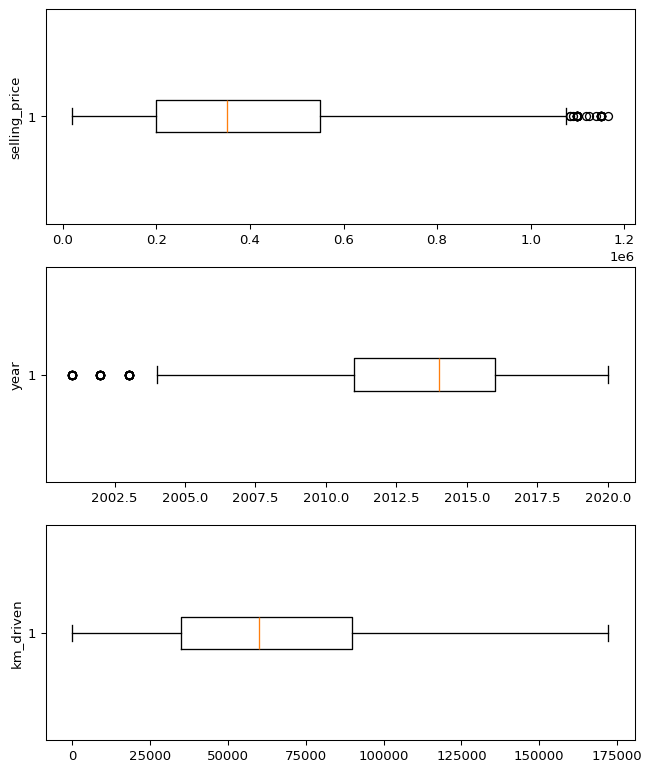

In [597]:
c1=df[["selling_price","year","km_driven"]]
fig,axes=plt.subplots(len(c1.columns),1,dpi=95,figsize=(8,10))
i=0
for col in c1.columns:
  axes[i].boxplot(df[col],vert=False)
  axes[i].set_ylabel(col)
  i=i+1
plt.show()

**->find correlation between selling_price,year and km_driven using heatmap (only for numerical data)**

In [598]:
selected_columns = ['selling_price', 'km_driven', 'year']
df_selected = df[selected_columns]

In [599]:
correlation_matrix = df_selected.corr()

In [600]:
correlation_matrix

,selling_price,km_driven,year
selling_price,1.000000,-0.285444,0.638756
km_driven,-0.285444,1.000000,-0.482762
year,0.638756,-0.482762,1.000000


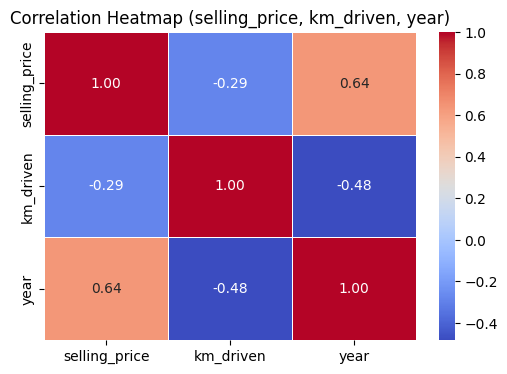

In [601]:
import seaborn as sns
plt.figure(figsize=(6, 4))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap (selling_price, km_driven, year)")
plt.show()


In [602]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [603]:
import seaborn as sns

**-> correlation between categorical and numerical data**

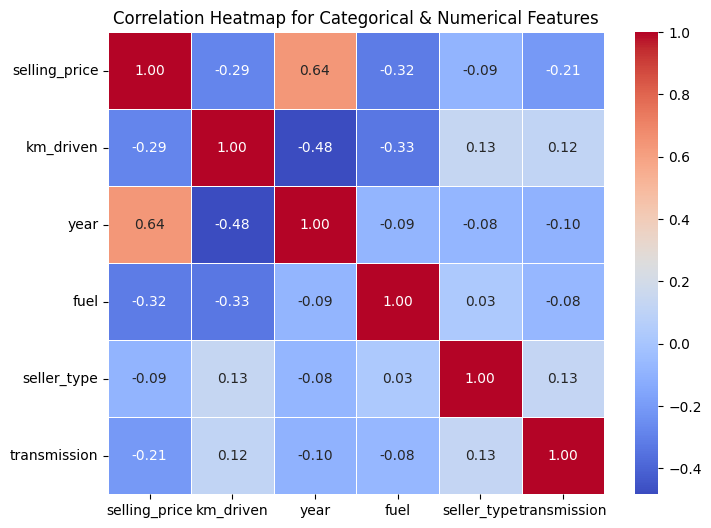

In [604]:

from scipy.stats import pointbiserialr, spearmanr

categorical_cols = ['fuel', 'seller_type','transmission']
numerical_cols = ['selling_price', 'km_driven', 'year']

df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

correlation_matrix = df_encoded[numerical_cols + categorical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Categorical & Numerical Features")
plt.show()


In [605]:
df['selling_price'].value_counts(normalize=True)

,proportion
selling_price,
300000,0.038766
250000,0.030604
350000,0.030094
550000,0.026524
600000,0.025759
...,...
1165000,0.000255
231999,0.000255
614000,0.000255


**-> proportionality**

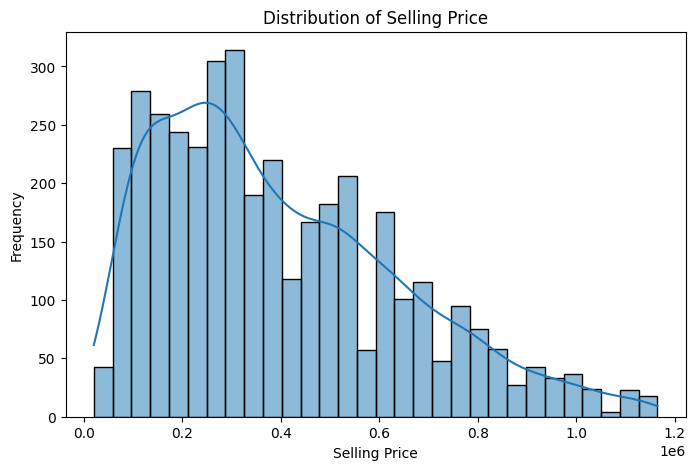

In [606]:
plt.figure(figsize=(8, 5))
sns.histplot(df['selling_price'], bins=30, kde=True)  # KDE smooths the curve
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

In [607]:
df['selling_price'].value_counts()

,count
selling_price,
300000,152
250000,120
350000,118
550000,104
600000,101
...,...
1165000,1
231999,1
614000,1


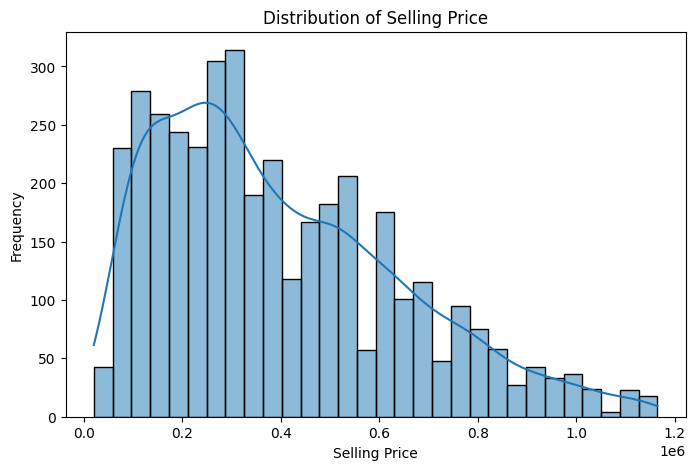

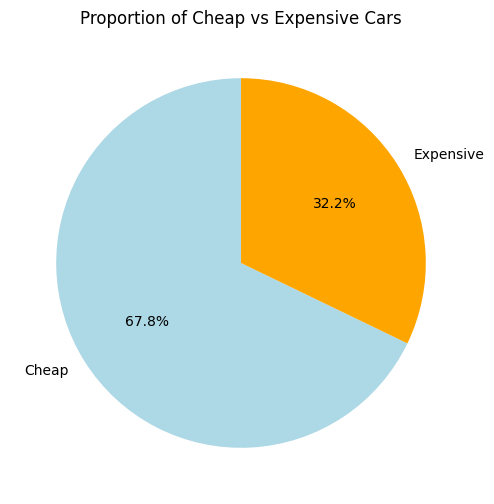

In [608]:
df['price_category'] = df['selling_price'].apply(lambda x: 'Cheap' if x < 500000 else 'Expensive')

# Count occurrences of each category
category_counts = df['price_category'].value_counts()

# Plot histogram of selling price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

# Plot pie chart for price category distribution
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['lightblue', 'orange'], startangle=90)
plt.title("Proportion of Cheap vs Expensive Cars")
plt.show()

In [609]:
year_counts = df['year'].value_counts()

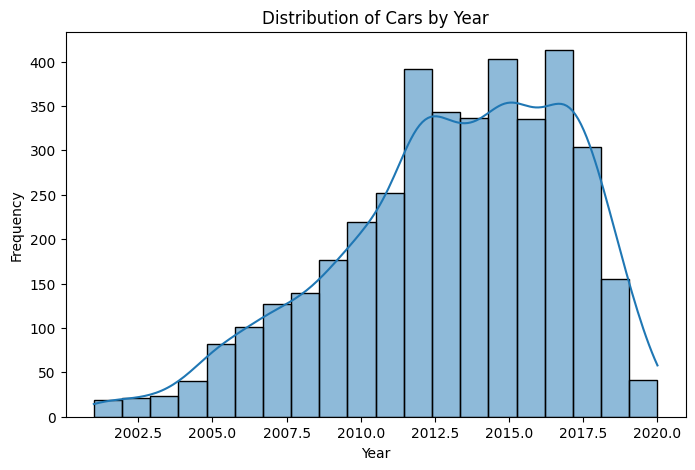

In [610]:
plt.figure(figsize=(8, 5))
sns.histplot(df['year'], bins=20, kde=True)
plt.title("Distribution of Cars by Year")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

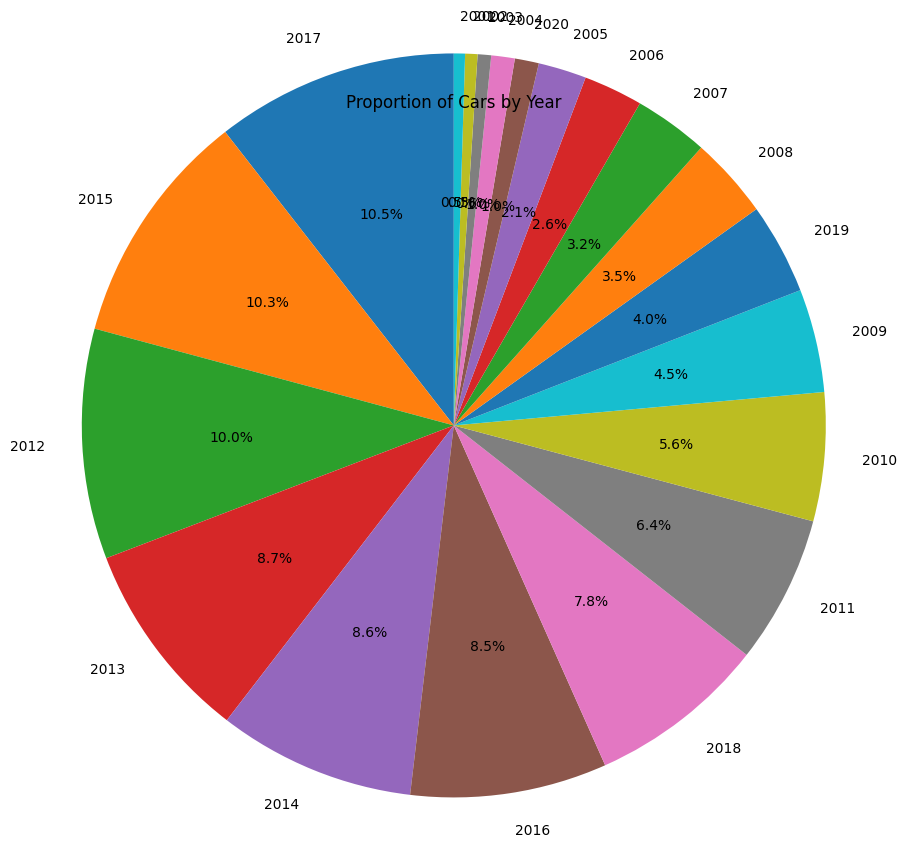

In [611]:
plt.figure(figsize=(8, 25))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=90,radius=1.5)
plt.title("Proportion of Cars by Year")
plt.show()

In [612]:
top_years = year_counts.nlargest(10)

In [613]:
df['year'].value_counts()

,count
year,
2017,413
2015,403
2012,392
2013,343
2014,336
2016,335
2018,304
2011,252
2010,219


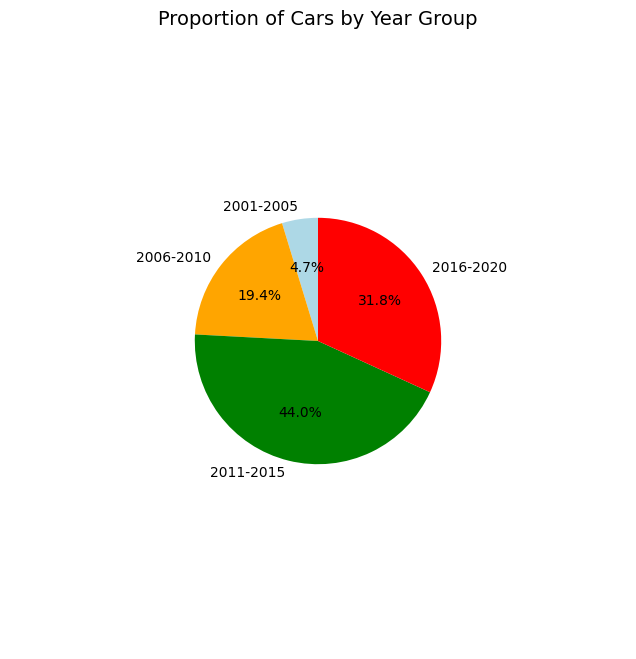

In [614]:
bins = [2000, 2005, 2010, 2015, 2020]
labels = ["2001-2005", "2006-2010", "2011-2015", "2016-2020"]

df['year_group'] = pd.cut(df['year'], bins=bins, labels=labels, right=True)

year_group_counts = df['year_group'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
plt.pie(year_group_counts, labels=year_group_counts.index, autopct='%1.1f%%', startangle=90, colors=["lightblue", "orange", "green", "red"], radius=0.5)
plt.title("Proportion of Cars by Year Group", fontsize=14)
plt.show()

In [615]:
df.nunique()

,0
name,1342
year,20
selling_price,355
km_driven,679
fuel,5
seller_type,3
transmission,2
owner,5
price_category,2
year_group,4


In [616]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,3921,1342,Maruti Swift Dzire VDI,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,3921.0,NaN,NaN,NaN,2013.104565,3.975856,2001.0,2011.0,2014.0,2016.0,2020.0
selling_price,3921.0,NaN,NaN,NaN,396103.938536,247408.137345,20000.0,200000.0,350000.0,550000.0,1165000.0
km_driven,3921.0,NaN,NaN,NaN,62958.699311,36290.619149,1.0,35000.0,60000.0,90000.0,172000.0
fuel,3921,5,Petrol,2046,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_type,3921,3,Individual,2979,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,3921,2,Manual,3671,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner,3921,5,First Owner,2544,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price_category,3921,2,Cheap,2660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_group,3921,4,2011-2015,1726,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [617]:
df.describe()

,year,selling_price,km_driven
count,3921.000000,3.921000e+03,3921.000000
mean,2013.104565,3.961039e+05,62958.699311
std,3.975856,2.474081e+05,36290.619149
min,2001.000000,2.000000e+04,1.000000
25%,2011.000000,2.000000e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,5.500000e+05,90000.000000
max,2020.000000,1.165000e+06,172000.000000


**EDA**

**-> create a new column brand based on name column**

In [618]:
df["brand"] = df["name"].str.split(" ").str[0]

**-> change owner column categorical data to numeric form
where first owner = 1 , second owner = 2, third owner = 3 , fourth and above owner = 4 and test drive car =0**

In [619]:
map_with_owner = {
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth & Above Owner": 4,
    "Test Drive Car": 0
}
df["owner"] = df["owner"].map(map_with_owner)

**-> change transmission categorical data to numeric from
where manual = 1 and automatic = 0**

In [620]:
t1={
    "Manual":1,
    "Automatic":0
}
df["transmission"] = df["transmission"].map(t1)

**-> rename owner column name**

In [621]:
df.rename(columns={"owner":"1st to 4th = Owner and 0 = test drive car"},inplace=True)

**-> rename transmission column name**

In [622]:
df.rename(columns={"transmission":"transmission(manual=1,autumatic=0)"},inplace=True)

**-> create a new column car_age using year**

In [623]:
df["car_age"] = 2025 - df["year"]

**-> make a new column km_per_year based on km_driven and car age**

In [624]:
df["km_per_year"] = (df["km_driven"] / df["car_age"].replace(0, 1)).astype(int)

**-> make a new column price_per_km based on selling_price and km_driven**

In [625]:
df["price_per_km"] = (df["selling_price"] / df["km_driven"].replace(0, 1)).round(2)

**-> create new column car type based on brand **

In [626]:
luxury_brands = ["Audi", "BMW", "Mercedes-Benz", "Jaguar", "Volvo", "Land"]
df["car_type"] = df["brand"].apply(lambda x: 1 if x in luxury_brands else 0)

**-> rename car_type column name**

In [627]:
df.rename(columns={"car_type":"car : luxury=1 & non-luxury=0"}, inplace=True)

**-> create new column based on fuel**

In [628]:
df["eco_friendly=1 & non_eco_friendly=0"] = df["fuel"].apply(lambda x: 1 if x in ["CNG", "Electric", "LPG"] else 0)

In [629]:
df["model"] = df["name"].str.split(" ").str[1]

In [630]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,"transmission(manual=1,autumatic=0)",1st to 4th = Owner and 0 = test drive car,price_category,year_group,brand,car_age,km_per_year,price_per_km,car : luxury=1 & non-luxury=0,eco_friendly=1 & non_eco_friendly=0,model
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,1,1,Cheap,2006-2010,Maruti,18,3888,0.86,0,0,800
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,1,1,Cheap,2006-2010,Maruti,18,2777,2.70,0,0,Wagon
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,1,1,Expensive,2011-2015,Hyundai,13,7692,6.00,0,0,Verna
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,1,1,Cheap,2016-2020,Datsun,8,5750,5.43,0,0,RediGO
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,1,2,Cheap,2011-2015,Honda,11,12818,3.19,0,0,Amaze


**-> handling missing values**

In [631]:
df.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
"transmission(manual=1,autumatic=0)",0
1st to 4th = Owner and 0 = test drive car,0
price_category,0
year_group,0


In [632]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
"transmission(manual=1,autumatic=0)",0
1st to 4th = Owner and 0 = test drive car,0
price_category,0
year_group,0


**-> generate summary of all columns, t means transpose swapiing rows and columns**

In [633]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,3921,1342,Maruti Swift Dzire VDI,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,3921.0,NaN,NaN,NaN,2013.104565,3.975856,2001.0,2011.0,2014.0,2016.0,2020.0
selling_price,3921.0,NaN,NaN,NaN,396103.938536,247408.137345,20000.0,200000.0,350000.0,550000.0,1165000.0
km_driven,3921.0,NaN,NaN,NaN,62958.699311,36290.619149,1.0,35000.0,60000.0,90000.0,172000.0
fuel,3921,5,Petrol,2046,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_type,3921,3,Individual,2979,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"transmission(manual=1,autumatic=0)",3921.0,NaN,NaN,NaN,0.936241,0.244355,0.0,1.0,1.0,1.0,1.0
1st to 4th = Owner and 0 = test drive car,3921.0,NaN,NaN,NaN,1.44504,0.700293,0.0,1.0,1.0,2.0,4.0
price_category,3921,2,Cheap,2660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_group,3921,4,2011-2015,1726,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**-> used for find datatype of each column**

In [634]:
df.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
"transmission(manual=1,autumatic=0)",int64
1st to 4th = Owner and 0 = test drive car,int64
price_category,object
year_group,category


**-> following code is used for analyze relationship between various columns**

In [684]:
brand_seller_counts = df.groupby(['brand', 'selling_price','fuel','car_age','model']).size().reset_index(name='counts')

In [685]:
brand_seller_counts

,brand,selling_price,fuel,car_age,model,counts
0,Ambassador,50000,Diesel,23,Classic,1
1,Ambassador,120000,Diesel,20,CLASSIC,2
2,Ambassador,430000,Petrol,13,Grand,1
3,Audi,650000,Petrol,17,A6,1
4,Audi,850000,Diesel,15,A6,1
...,...,...,...,...,...,...
2895,Volkswagen,890000,Diesel,8,Vento,2
2896,Volkswagen,936999,Petrol,8,Jetta,1
2897,Volkswagen,940000,Diesel,16,Jetta,1
2898,Volkswagen,950000,Petrol,6,Polo,1


In [686]:
brand_seller_counts.max()

,0
brand,Volkswagen
selling_price,1165000
fuel,Petrol
car_age,24
model,redi-GO
counts,17


In [687]:
brand_seller_counts.min()

,0
brand,Ambassador
selling_price,20000
fuel,CNG
car_age,5
model,1.4
counts,1


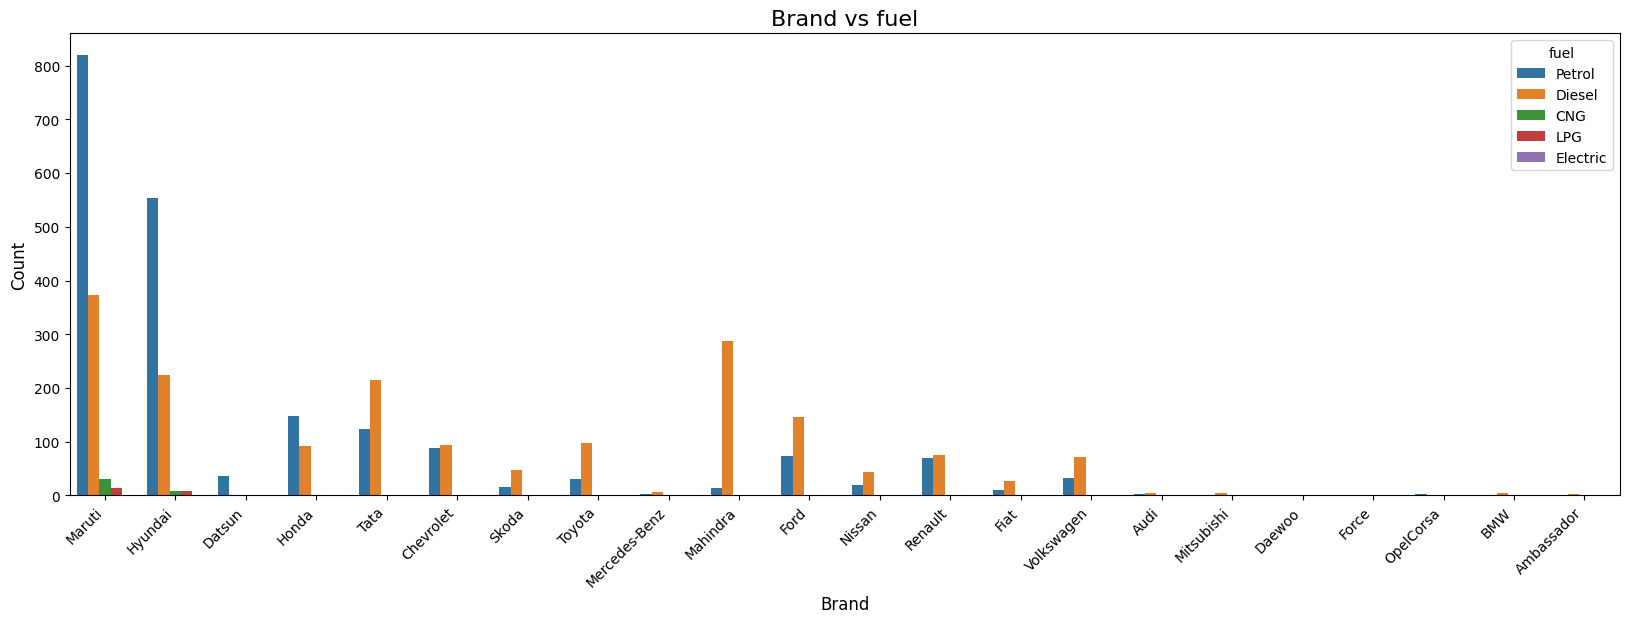

In [688]:

plt.figure(figsize=(20, 6))
sns.countplot(x='brand', hue='fuel', data=df)
plt.title('Brand vs fuel', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

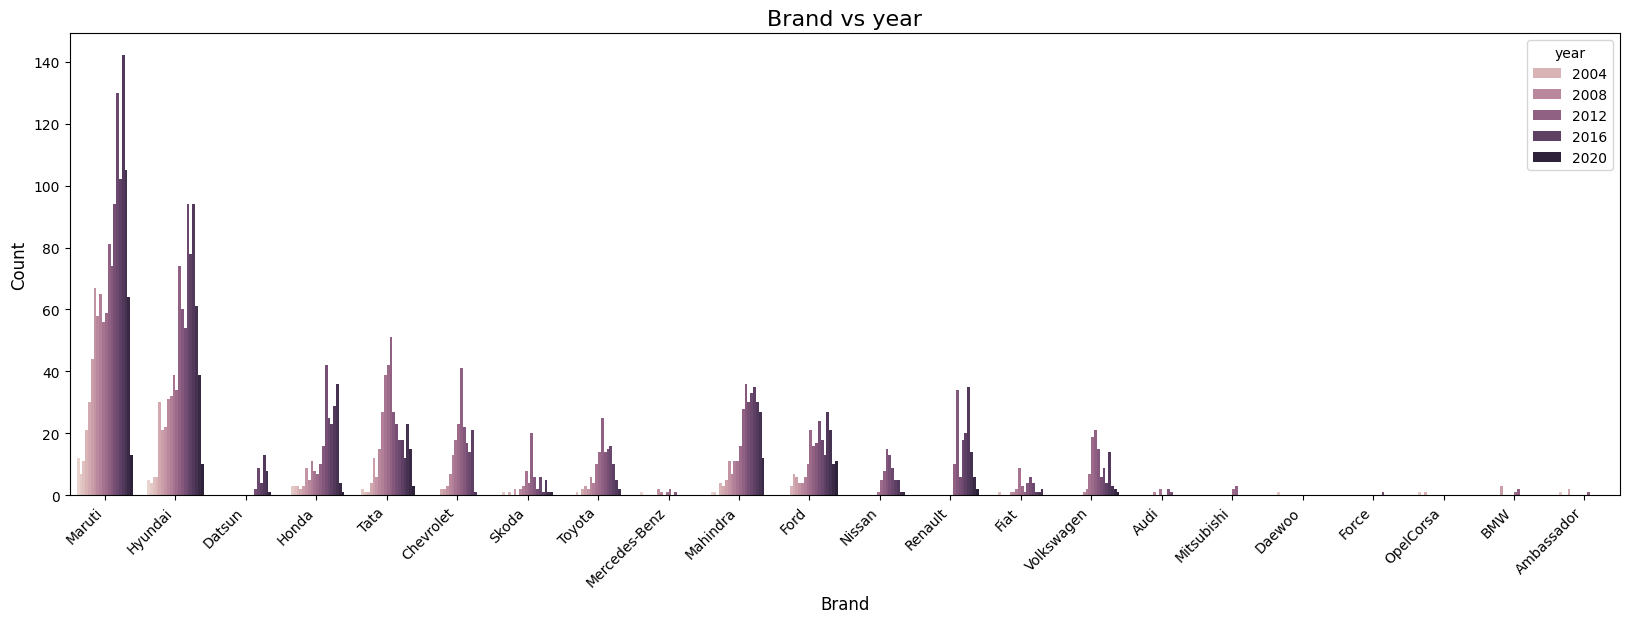

In [689]:
plt.figure(figsize=(20, 6))
sns.countplot(x='brand', hue='year', data=df)
plt.title('Brand vs year', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

**->Linear Regression**

In [690]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [691]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission(manual=1,autumatic=0)',
       '1st to 4th = Owner and 0 = test drive car', 'brand', 'car_age',
       'km_per_year', 'price_per_km', 'car : luxury=1 & non-luxury=0',
       'eco_friendly=1 & non_eco_friendly=0', 'model'],
      dtype='object')

In [700]:
numerical_features = ['year', 'km_driven', 'car_age', 'km_per_year', 'price_per_km','transmission(manual=1,autumatic=0)','1st to 4th = Owner and 0 = test drive car','car : luxury=1 & non-luxury=0','eco_friendly=1 & non_eco_friendly=0']
categorical_features = ['fuel', 'seller_type', 'brand']

In [701]:
num_transformer = StandardScaler()

In [702]:
cat_transformer = OneHotEncoder(handle_unknown='ignore')

In [703]:
preprocessor = ColumnTransformer([
    ('num', num_transformer, numerical_features),
    ('cat', cat_transformer, categorical_features)
])

In [704]:
X = df.drop(columns=['selling_price'])
y = df['selling_price']

In [705]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [706]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [707]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'km_driven',
                                                   'car_age', 'km_per_year',
                                                   'price_per_km',
                                                   'transmission(manual=1,autumatic=0)',
                                                   '1st to 4th = Owner and 0 = '
                                                   'test drive car',
                                                   'car : luxury=1 & '
                                                   'non-luxury=0',
                                                   'eco_friendly=1 & '
                                                   'non_eco_friendly=0']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['fuel', 'seller_type',
                                                   'brand'])])),
                ('regressor', LinearRegression())])

In [708]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 112636.05934983546
Mean Squared Error (MSE): 22171791933.131184
Root Mean Squared Error (RMSE): 148901.95409440127
R² Score: 0.6289249855239448


**->Logistic Regression**

In [709]:
df['price_category'] = pd.qcut(df['selling_price'], q=3, labels=['Low', 'Medium', 'High'])

print(df['price_category'].value_counts())

price_category
Low       1408
High      1304
Medium    1209
Name: count, dtype: int64


In [710]:
X = df.drop(columns=['selling_price', 'price_category'])

y = df['price_category']

In [711]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [715]:
model1= Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000))
])

In [716]:
model1.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'km_driven',
                                                   'car_age', 'km_per_year',
                                                   'price_per_km',
                                                   'transmission(manual=1,autumatic=0)',
                                                   '1st to 4th = Owner and 0 = '
                                                   'test drive car',
                                                   'car : luxury=1 & '
                                                   'non-luxury=0',
                                                   'eco_friendly=1 & '
                                                   'non_eco_friendly=0']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['fuel', 'seller_type',
                                                   'brand'])])),
                ('regressor',
                 LogisticRegression(max_iter=1000, multi_class='ovr'))])

In [719]:
y_pred = model1.predict(X_test)

In [720]:
accuracy = accuracy_score(y_test, y_pred)

In [721]:
accuracy

0.7197452229299363

**->K-Nearest Neighbors**

In [722]:
from sklearn.neighbors import KNeighborsClassifier

In [723]:
model3= Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

model3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'km_driven',
                                                   'car_age', 'km_per_year',
                                                   'price_per_km',
                                                   'transmission(manual=1,autumatic=0)',
                                                   '1st to 4th = Owner and 0 = '
                                                   'test drive car',
                                                   'car : luxury=1 & '
                                                   'non-luxury=0',
                                                   'eco_friendly=1 & '
                                                   'non_eco_friendly=0']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['fuel', 'seller_type',
                                                   'brand'])])),
                ('classifier', KNeighborsClassifier())])

In [725]:
y_pred = model3.predict(X_test)

In [726]:
accuracy1 = accuracy_score(y_test, y_pred)

In [727]:
accuracy1

0.7146496815286624

In [728]:
from sklearn.tree import DecisionTreeClassifier

In [729]:
model4 = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42))
])

In [730]:
model4.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'km_driven',
                                                   'car_age', 'km_per_year',
                                                   'price_per_km',
                                                   'transmission(manual=1,autumatic=0)',
                                                   '1st to 4th = Owner and 0 = '
                                                   'test drive car',
                                                   'car : luxury=1 & '
                                                   'non-luxury=0',
                                                   'eco_friendly=1 & '
                                                   'non_eco_friendly=0']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['fuel', 'seller_type',
                                                   'brand'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=10, random_state=42))])

In [731]:
y_pred = model4.predict(X_test)

In [732]:
accuracy2 = accuracy_score(y_test, y_pred)

In [733]:
accuracy2

0.9477707006369427

In [734]:
report = classification_report(y_test, y_pred)

In [736]:
print("\n",report)


               precision    recall  f1-score   support

        High       0.95      0.95      0.95       261
         Low       0.96      0.98      0.97       282
      Medium       0.93      0.90      0.92       242

    accuracy                           0.95       785
   macro avg       0.95      0.95      0.95       785
weighted avg       0.95      0.95      0.95       785



In [737]:
cm = confusion_matrix(y_test, y_pred)

In [738]:
cm

array([[249,   0,  12],
       [  2, 276,   4],
       [ 11,  12, 219]])

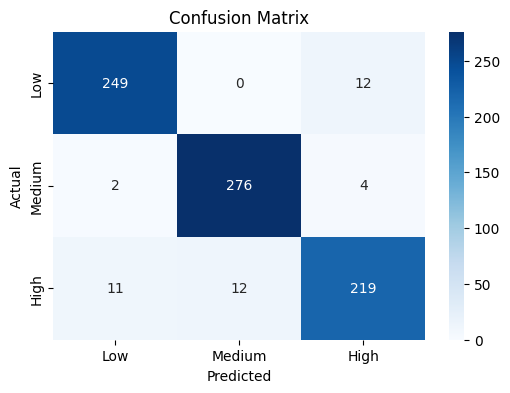

In [739]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [740]:
from sklearn.tree import plot_tree

IndexError: index 38 is out of bounds for axis 0 with size 16

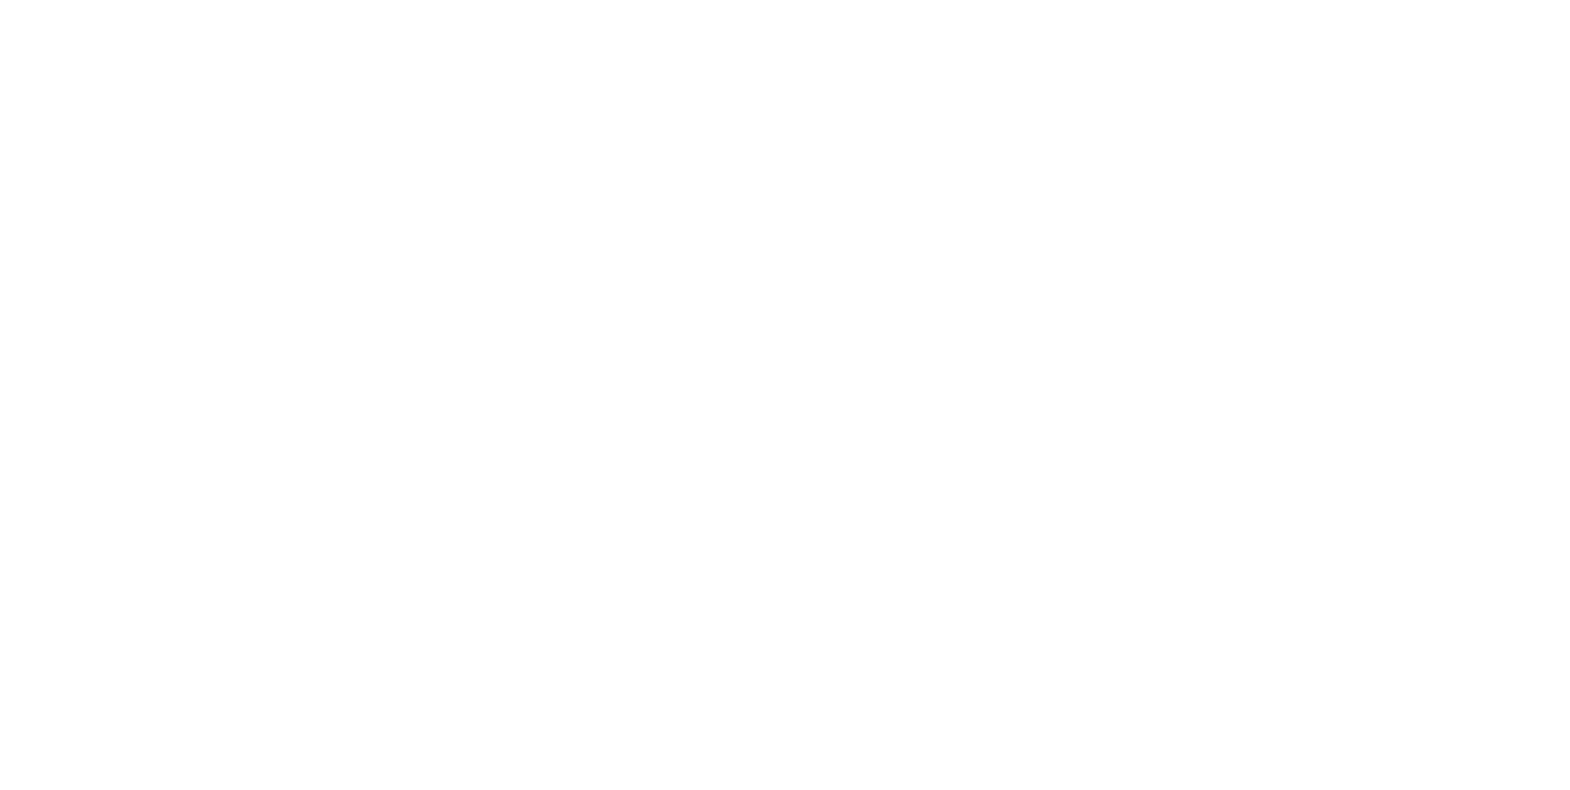

In [743]:
tree_classifier = model4.named_steps['classifier']

# Plot Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(tree_classifier, feature_names=df.columns, class_names=['Low', 'Medium', 'High'], filled=True, fontsize=8)
plt.show()

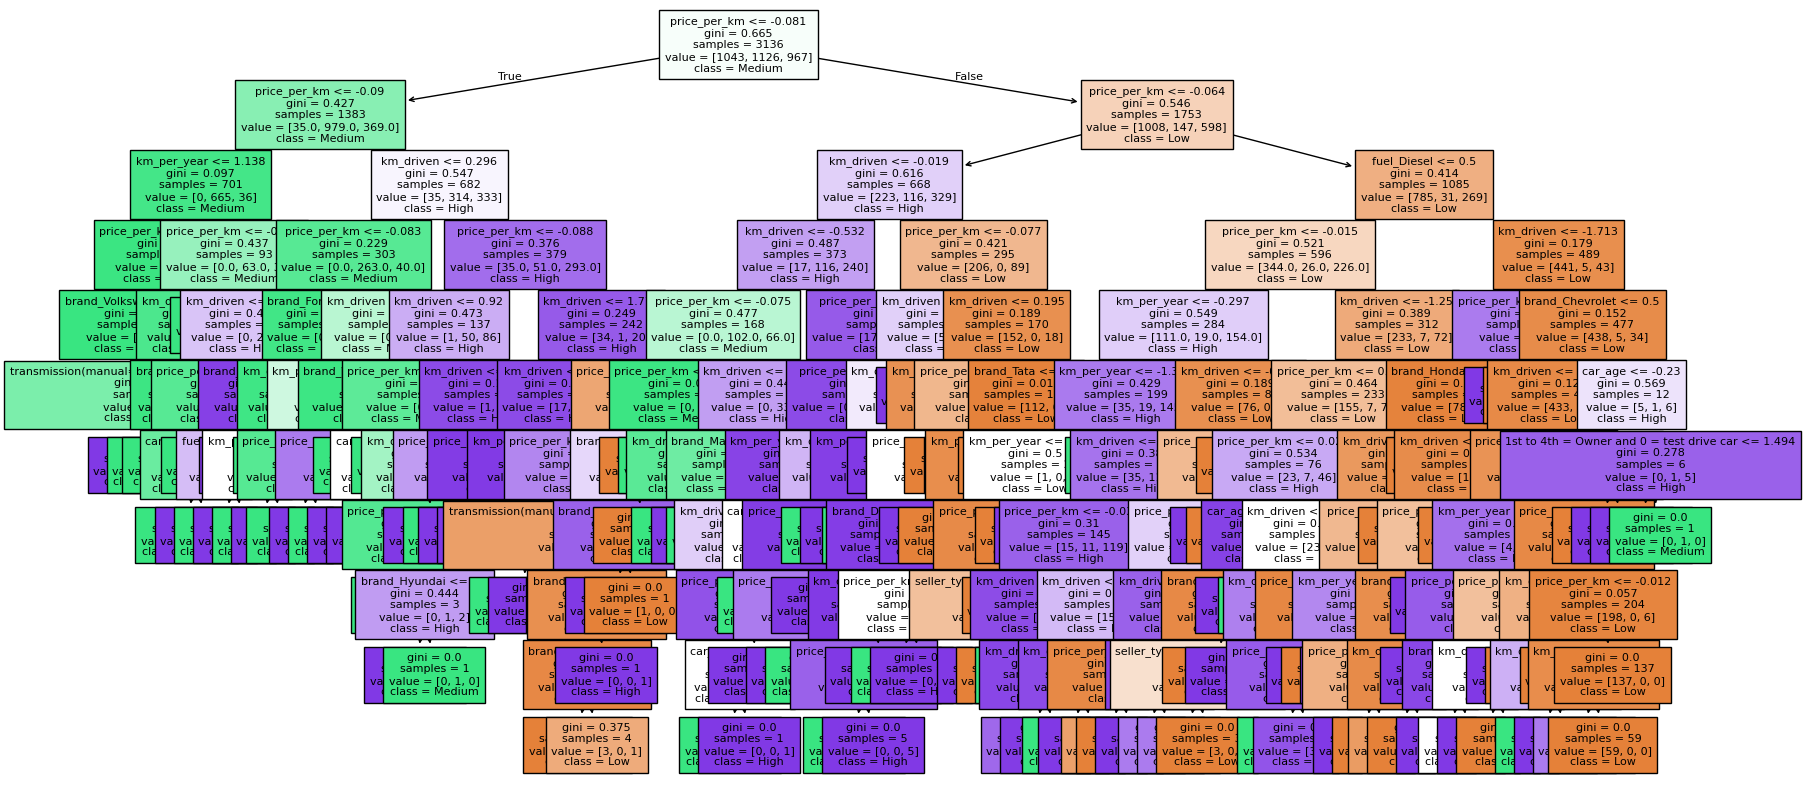

In [744]:
# Get feature names after preprocessing
cat_feature_names = model4.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numerical_features, cat_feature_names])

# Plot Decision Tree with correct feature names
plt.figure(figsize=(20, 10))
plot_tree(tree_classifier,
          feature_names=all_feature_names,  # Use the updated feature names
          class_names=['Low', 'Medium', 'High'],
          filled=True,
          fontsize=8)
plt.show()